In [1]:
import warnings
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from tqdm.auto import tqdm
import qgrid
import re

sns.set(style="ticks", palette="muted", color_codes=True)

warnings.filterwarnings("ignore")

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

In [2]:
def show_tbl(df):
    return qgrid.showgrid(df, show_toolbar=True)

In [3]:
df = pd.read_csv("Combined_all_air_pollut_types&coords.csv", parse_dates=['DATE'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542322 entries, 0 to 542321
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATE                    542322 non-null  datetime64[ns]
 1   POLSTID                 542322 non-null  object        
 2   Voivodeship             542322 non-null  object        
 3   City                    542322 non-null  object        
 4   county                  542322 non-null  object        
 5   postcode                542322 non-null  object        
 6   LAT                     542322 non-null  float64       
 7   LON                     542322 non-null  float64       
 8   NO2_24H_AVG_POLLUTION   5035 non-null    float64       
 9   O3_24H_AVG_POLLUTION    184172 non-null  float64       
 10  PM10_24H_AVG_POLLUTION  303605 non-null  float64       
 11  PM25_24H_AVG_POLLUTION  113597 non-null  float64       
dtypes: datetime64[ns](1), float64(

In [5]:
df.isnull().sum()

DATE                           0
POLSTID                        0
Voivodeship                    0
City                           0
county                         0
postcode                       0
LAT                            0
LON                            0
NO2_24H_AVG_POLLUTION     537287
O3_24H_AVG_POLLUTION      358150
PM10_24H_AVG_POLLUTION    238717
PM25_24H_AVG_POLLUTION    428725
dtype: int64

In [6]:
df.columns

Index(['DATE', 'POLSTID', 'Voivodeship', 'City', 'county', 'postcode', 'LAT',
       'LON', 'NO2_24H_AVG_POLLUTION', 'O3_24H_AVG_POLLUTION',
       'PM10_24H_AVG_POLLUTION', 'PM25_24H_AVG_POLLUTION'],
      dtype='object')

In [7]:
for col in ['POLSTID', 'Voivodeship', 'City', 'county', 'postcode']:
    print(f"{col} : Total unique categories: {len(set(df[col]))}")

POLSTID : Total unique categories: 297
Voivodeship : Total unique categories: 16
City : Total unique categories: 225
county : Total unique categories: 197
postcode : Total unique categories: 271


# Preliminary EDA

Number of stations that does not record PM10 pollutant = 66


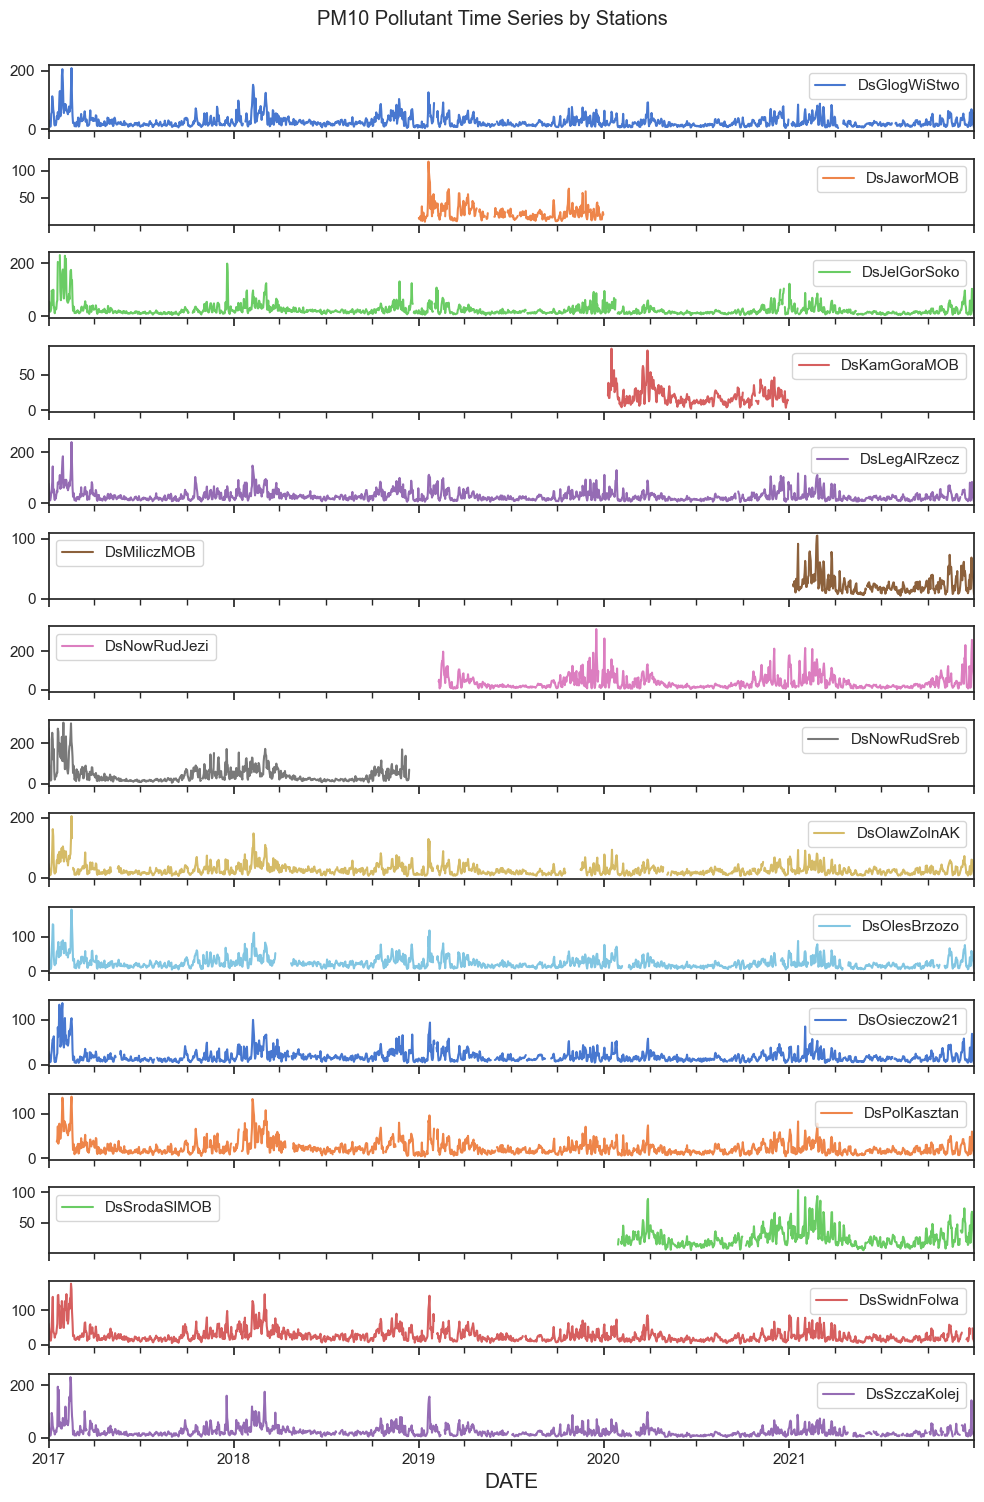

In [10]:
pm10_null_stations = \
df.groupby('POLSTID')['PM10_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['PM10_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record PM10 pollutant = {len(pm10_null_stations)}')

df.loc[~df['POLSTID'].isin(pm10_null_stations)].\
    groupby(['POLSTID', 'DATE'])['PM10_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').iloc[:, :15].\
            plot(subplots=True, figsize=(10, 15));

plt.suptitle("PM10 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

Some stations have incomplete readings. Some stations seems to take measurements after a certain time periods.

Number of stations that does not record NO2 pollutant = 294


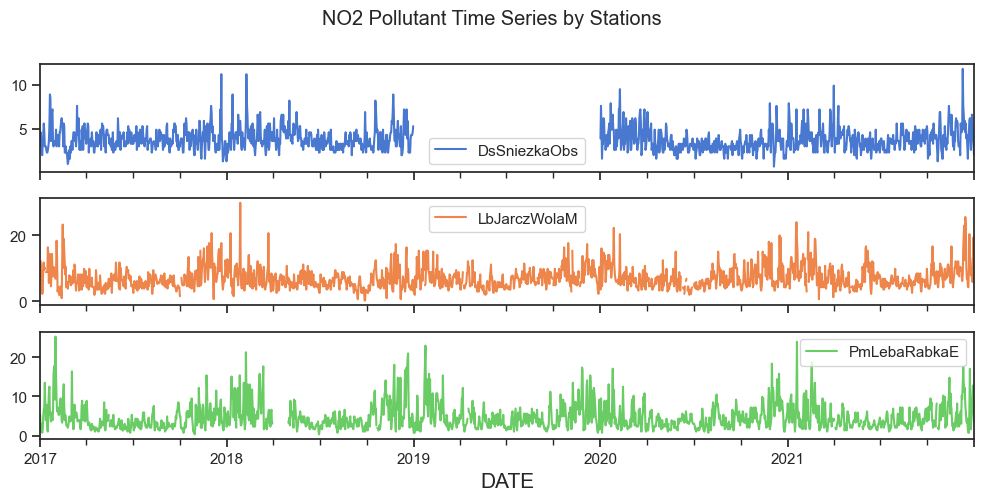

In [12]:
no2_null_stations = \
df.groupby('POLSTID')['NO2_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['NO2_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record NO2 pollutant = {len(no2_null_stations)}')

df.loc[~df['POLSTID'].isin(no2_null_stations)].\
    groupby(['POLSTID', 'DATE'])['NO2_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').plot(subplots=True, figsize=(10, 5));

plt.suptitle("NO2 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

The first station has no measurements for the year of 2019.  Other stations have small gaps in data too.

Number of stations that does not record O3 pollutant = 172


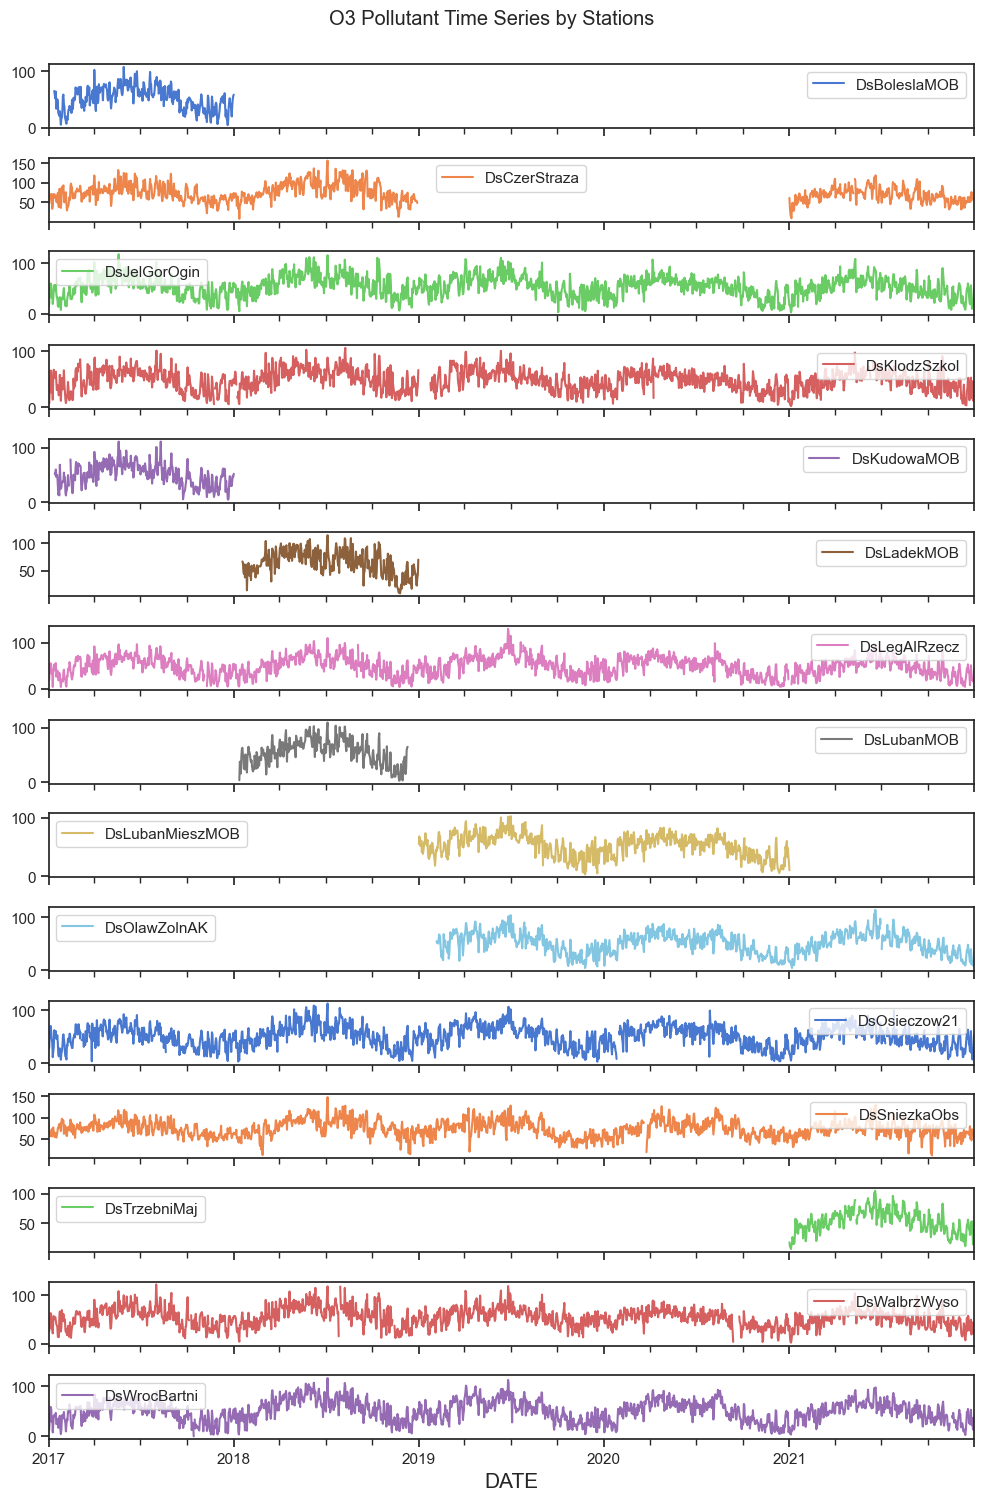

In [13]:
o3_null_stations = \
df.groupby('POLSTID')['O3_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['O3_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record O3 pollutant = {len(o3_null_stations)}')

df.loc[~df['POLSTID'].isin(o3_null_stations)].\
    groupby(['POLSTID', 'DATE'])['O3_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').iloc[:, :15].\
            plot(subplots=True, figsize=(10, 15));

plt.suptitle("O3 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

Similar to Pm10 stations - many incomplete measurements.

Number of stations that does not record PM25 pollutant = 217


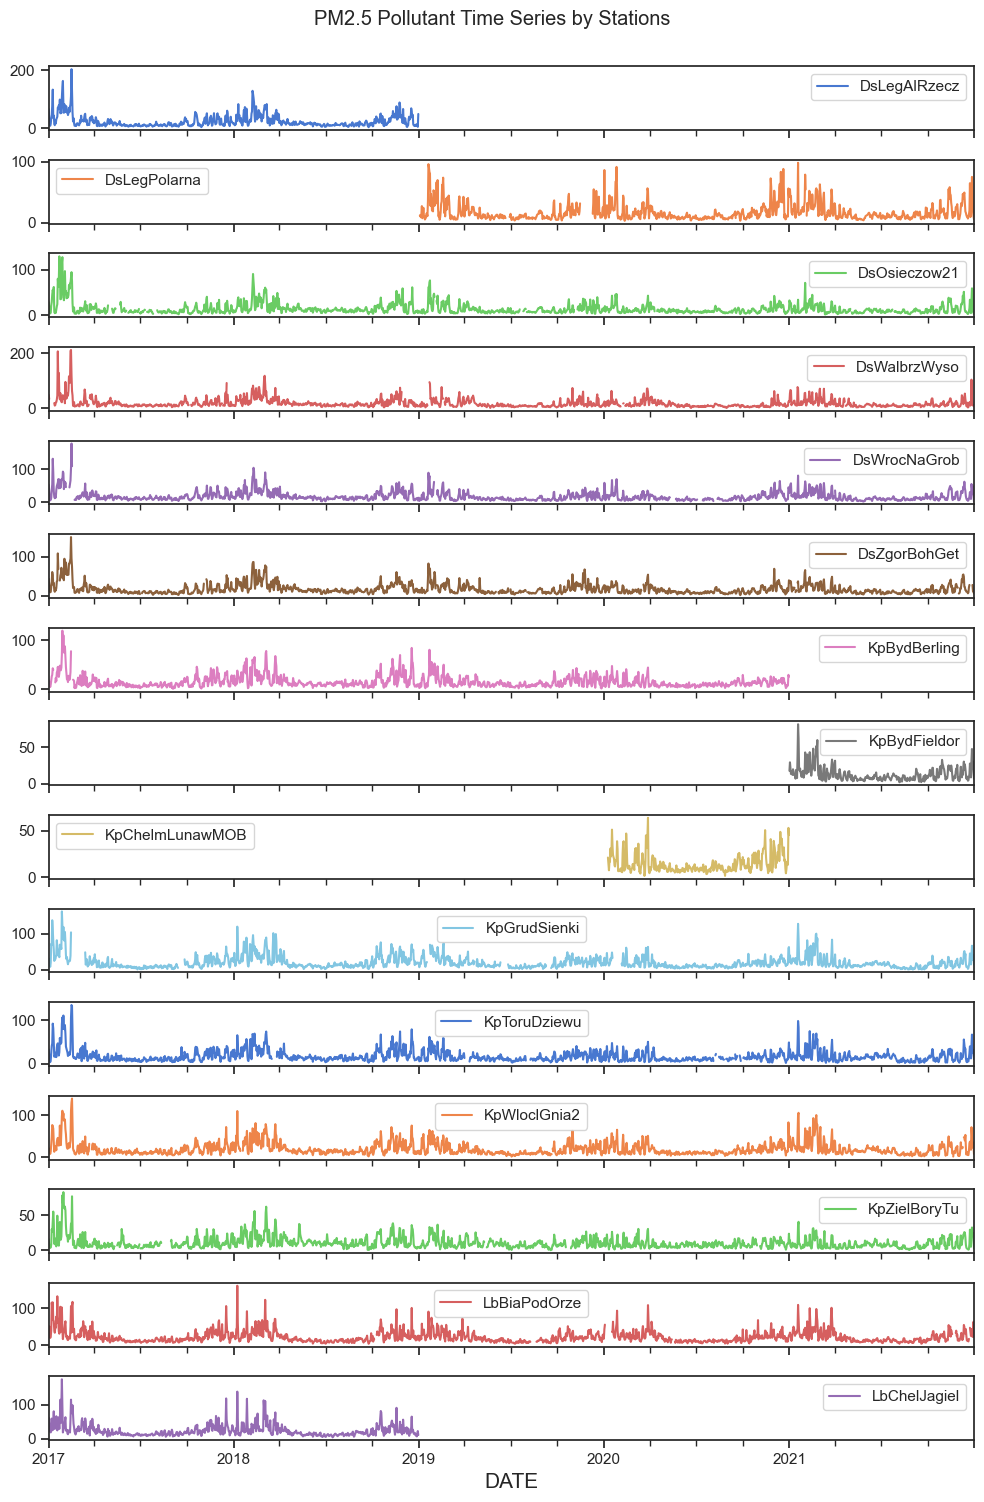

In [14]:
pm25_null_stations = \
df.groupby('POLSTID')['PM25_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['PM25_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record PM25 pollutant = {len(pm25_null_stations)}')

df.loc[~df['POLSTID'].isin(pm25_null_stations)].\
    groupby(['POLSTID', 'DATE'])['PM25_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').iloc[:, :15].\
            plot(subplots=True, figsize=(10, 15));

plt.suptitle("PM2.5 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

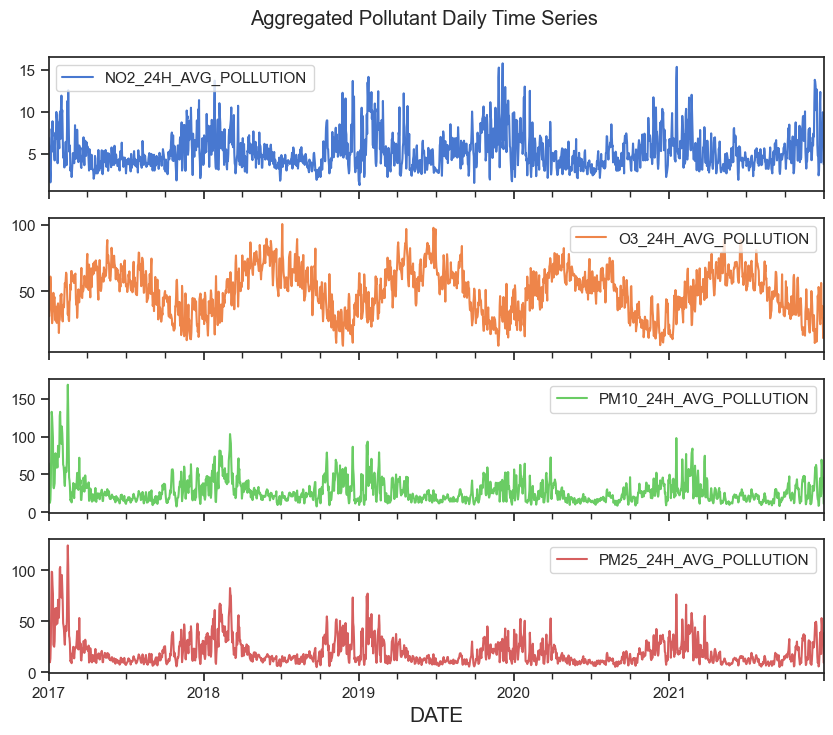

In [15]:
#Aggregating all stations and taking the mean to see overall patterns in pollution.

df.groupby('DATE')[[
    'NO2_24H_AVG_POLLUTION', 
    'O3_24H_AVG_POLLUTION', 
    'PM10_24H_AVG_POLLUTION', 
    'PM25_24H_AVG_POLLUTION'
]].mean().plot(subplots=True, figsize=(10, 8));

plt.suptitle("Aggregated Pollutant Daily Time Series",  y=0.94);

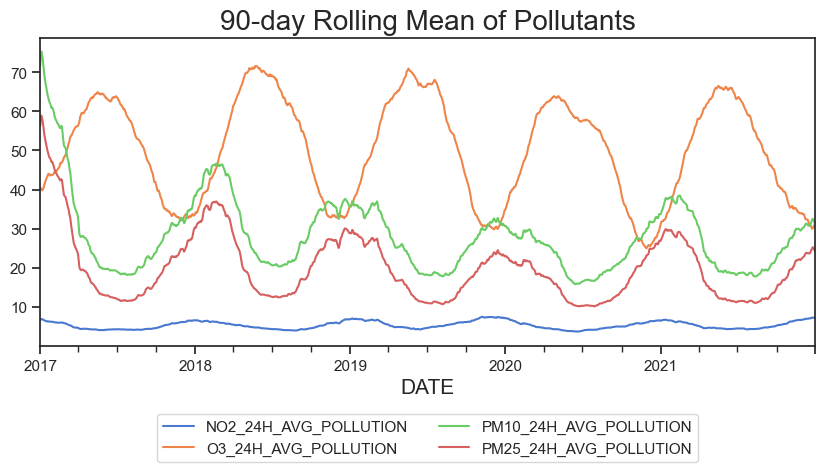

In [20]:
ax = \
df.groupby('DATE')[[
    'NO2_24H_AVG_POLLUTION', 
    'O3_24H_AVG_POLLUTION', 
    'PM10_24H_AVG_POLLUTION', 
    'PM25_24H_AVG_POLLUTION'
]].mean().rolling(90, center=True, min_periods=30).mean().\
    plot(figsize=(10, 4), title = "90-day Rolling Mean of Pollutants")

ax.legend(ncol=2, loc='center', bbox_to_anchor=(0.5, -0.3));

NO2, PM10 and PM25 seems to have same pattern whereas O3 has the opposite pattern.

In [21]:
#Extracting day, month, year and dayofweek features from DATE

df['day'] = df['DATE'].dt.day
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['dayofweek'] = df['DATE'].dt.dayofweek

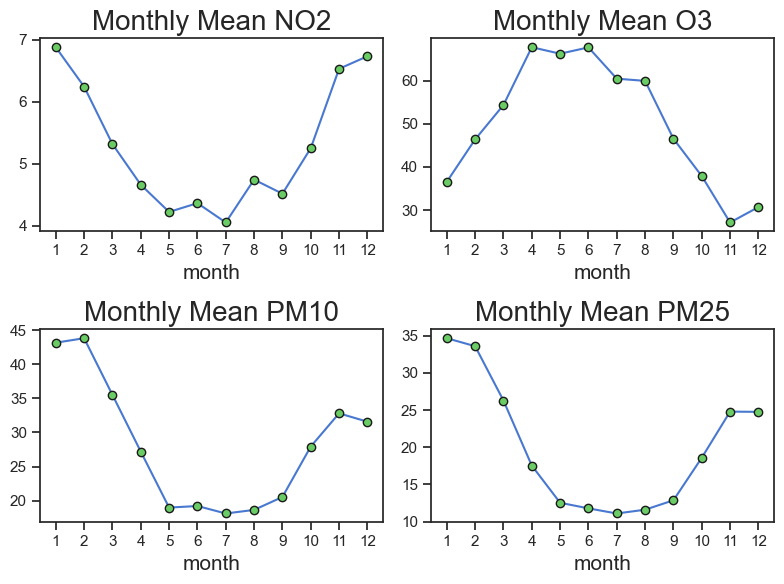

In [22]:
#Checking for monthly seasonality pattern
pollutant_cols = ['NO2_24H_AVG_POLLUTION', 'O3_24H_AVG_POLLUTION', 'PM10_24H_AVG_POLLUTION', 
                  'PM25_24H_AVG_POLLUTION']

fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6))

for col, ax in zip(pollutant_cols, axes.flatten()):
    
    df.groupby('month')[col].mean().plot(ax=ax, marker="o", mfc="g", mec="k")
    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_title(f'Monthly Mean {col.split("_")[0]}');

O3 seems to be highest during summer and lowest during winter. The opposite is true for the other pollutants. Will need to compare with weather data to understand patterns.

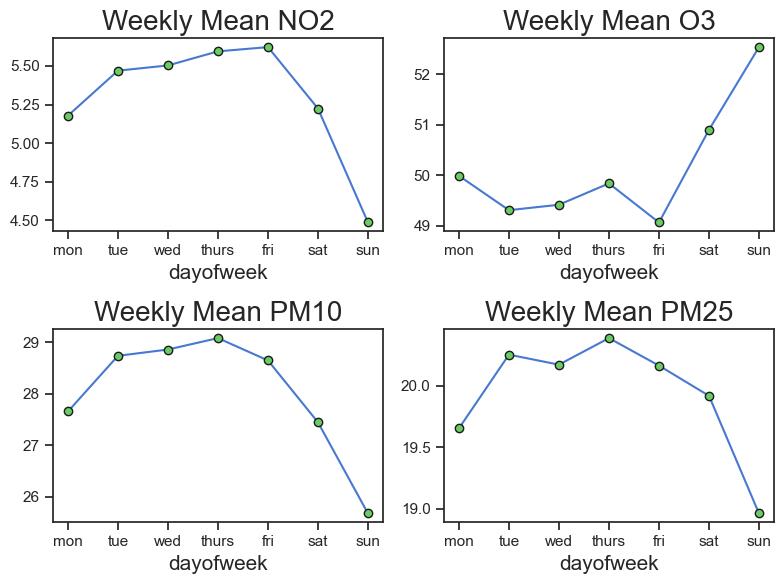

In [23]:
#Checking for weekly seasonality
days=["mon", "tue", "wed", "thurs", "fri", "sat", "sun"]

fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6))

for col, ax in zip(pollutant_cols, axes.flatten()):
    
    df.groupby('dayofweek')[col].mean().plot(ax=ax, marker="o", mfc="g", mec="k")
    ax.set_xticks(np.arange(7), days)
    ax.set_title(f'Weekly Mean {col.split("_")[0]}');

For O3, measurements are higher during the weekends and lower during working days. Where as the other pollutants shows the opposite patterns. This is an interesting observation. Perhaps, this shows that pollution depends on the number of cars on the roads? Will need to look deeper into this.

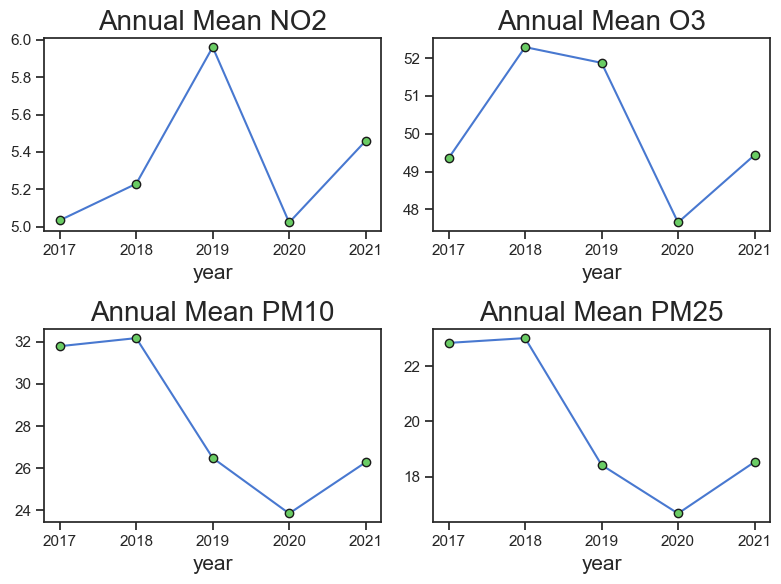

In [24]:
#Yearly Seasonality
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6))

for col, ax in zip(pollutant_cols, axes.flatten()):
    
    df.groupby('year')[col].mean().plot(ax=ax, marker="o", mfc="g", mec="k")
    ax.set_title(f'Annual Mean {col.split("_")[0]}');

All pollutants seems to have dropped during 2020. This could be attributed to COVID19.

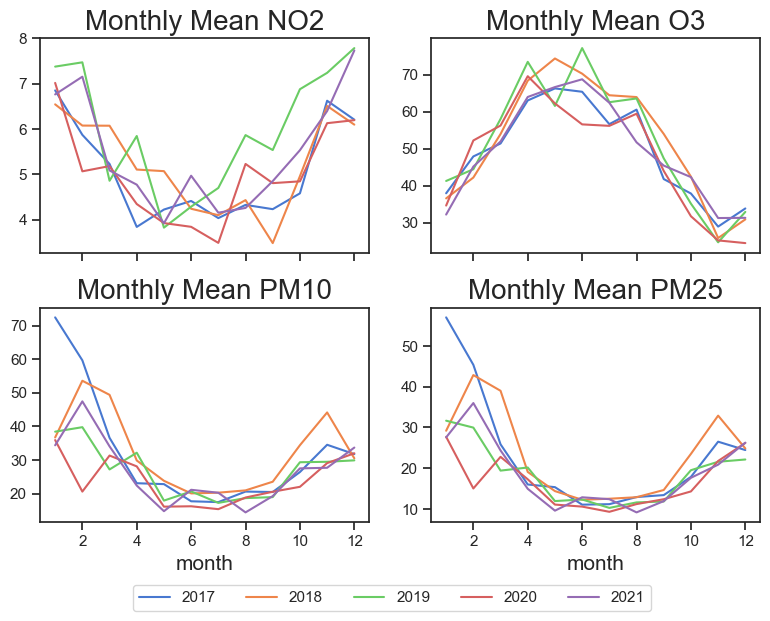

In [25]:
#Checking for monthly seasonality for each year.
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6), sharex=True)

for col, ax in zip(pollutant_cols, axes.flatten()):
    df.groupby(['year', 'month'])[pollutant_cols].mean().unstack('year')[col].\
        plot(ax=ax, title=f"Monthly Mean {col.split('_')[0]}", legend=None)
    
fig.legend(labels=df['year'].unique(), loc='center', bbox_to_anchor=(0.5,-0.01), ncol=5, 
           bbox_transform=fig.transFigure);

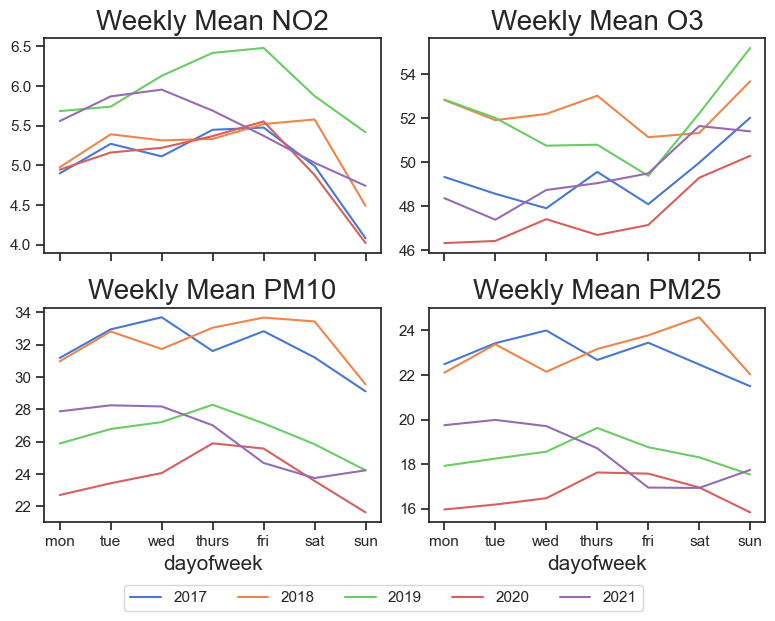

In [26]:
#Checking for weekly seasonality for each year.
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6), sharex=True)

for col, ax in zip(pollutant_cols, axes.flatten()):
    df.groupby(['year', 'dayofweek'])[pollutant_cols].mean().unstack('year')[col].\
        plot(ax=ax, title=f"Weekly Mean {col.split('_')[0]}", legend=None)
    
    ax.set_xticks(np.arange(7), days)
    
fig.legend(labels=df['year'].unique(), loc='center', bbox_to_anchor=(0.5,-0.01), ncol=5, 
           bbox_transform=fig.transFigure);

# NO2 Stations

In [27]:
#Filtering those stations that do not contain NO2 measurements
#Then creating a seperate dataframe for NO2 measurements and where each station is a column
no2_stations=\
df.loc[~df['POLSTID'].isin(no2_null_stations)].\
    groupby(['POLSTID', 'DATE'])['NO2_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID')

#Setting the date to daily frequency
no2_stations.index.freq='D'

#Only 3 stations measure NO2
no2_stations.head()

POLSTID     DsSniezkaObs  LbJarczWolaM  PmLebaRabkaE
DATE                                                
2017-01-01           3.3          12.2           5.3
2017-01-02           4.6          12.2           1.0
2017-01-03           3.0           8.2           3.0
2017-01-04           2.3           6.2           1.3
2017-01-05           2.0           2.3           0.7

In [28]:
no2_stations.isna().sum()

POLSTID
DsSniezkaObs    365
LbJarczWolaM     34
PmLebaRabkaE     44
dtype: int64

DsSniezkaObs station contains null values for whole 2019. Simply imputation techniques such as linear interpolation, forward fill, back fill, etc. wont suffice. We will need to use more comprehensive imputation techniques.

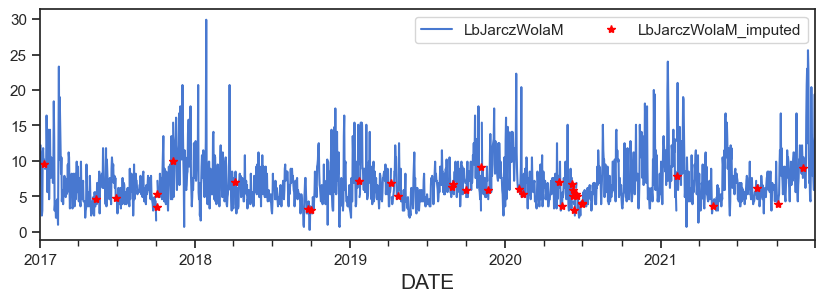

In [33]:
#Imputting other stations using linear interpolation
no2_stations['LbJarczWolaM_imputed']=\
no2_stations['LbJarczWolaM'].interpolate('linear')


ax=no2_stations['LbJarczWolaM'].plot(figsize=(10, 3))

no2_stations.loc[no2_stations['LbJarczWolaM'].isna(), 'LbJarczWolaM_imputed'].\
    plot(linestyle='', marker='*', c='red', ax=ax, label='LbJarczWolaM_imputed');

ax.legend(ncol=2, loc='upper right');

As there are only a few gaps here and there in the time series, linear interpolation will suffice. for this station.

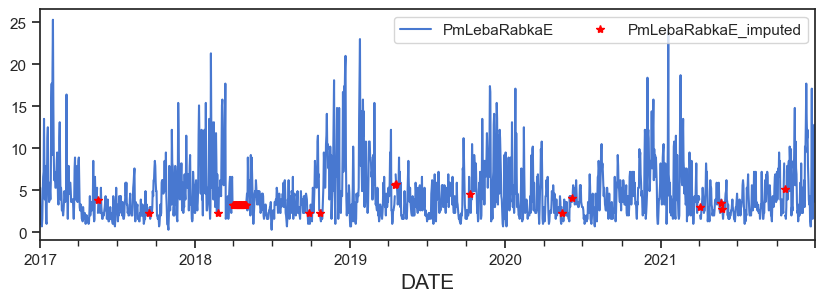

In [34]:
no2_stations['PmLebaRabkaE_imputed']=\
no2_stations['PmLebaRabkaE'].interpolate('linear')


ax=no2_stations['PmLebaRabkaE'].plot(figsize=(10, 3))

no2_stations.loc[no2_stations['PmLebaRabkaE'].isna(), 'PmLebaRabkaE_imputed'].\
    plot(linestyle='', marker='*', c='red', ax=ax, label='PmLebaRabkaE_imputed');

ax.legend(ncol=2, loc='upper right');

# Imputation using MSTL  (Season-Trend decomposition using LOESS for multiple seasonalities)




Github repo that provides information on STL/MSTL [trainindata Github Repo](https://github.com/trainindata/feature-engineering-for-time-series-forecasting/blob/main/05-Missing-Data/03-impute-missing-data-using-STL-decomposition-and-interpolation.ipynb)

Statsmodal documentation on MSTL: [MSTL](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.MSTL.html)

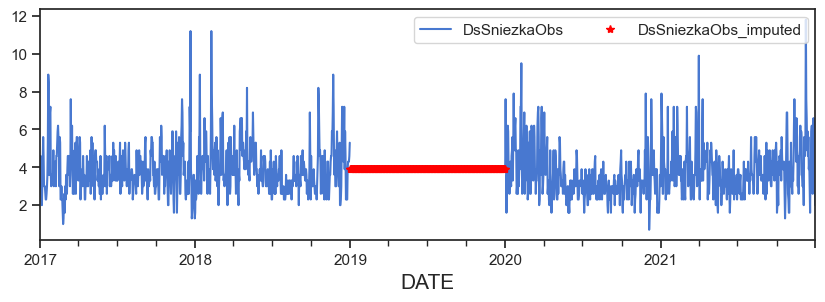

In [37]:
#Initial imputation using linear interpolation
no2_stations['DsSniezkaObs_first_impute']=\
no2_stations['DsSniezkaObs'].bfill()

ax=no2_stations['DsSniezkaObs'].plot(figsize=(10, 3))

no2_stations.loc[no2_stations['DsSniezkaObs'].isna(), 'DsSniezkaObs_first_impute'].\
    plot(linestyle='', marker='*', c='red', ax=ax, label='DsSniezkaObs_imputed');

ax.legend(ncol=2, loc='upper right');

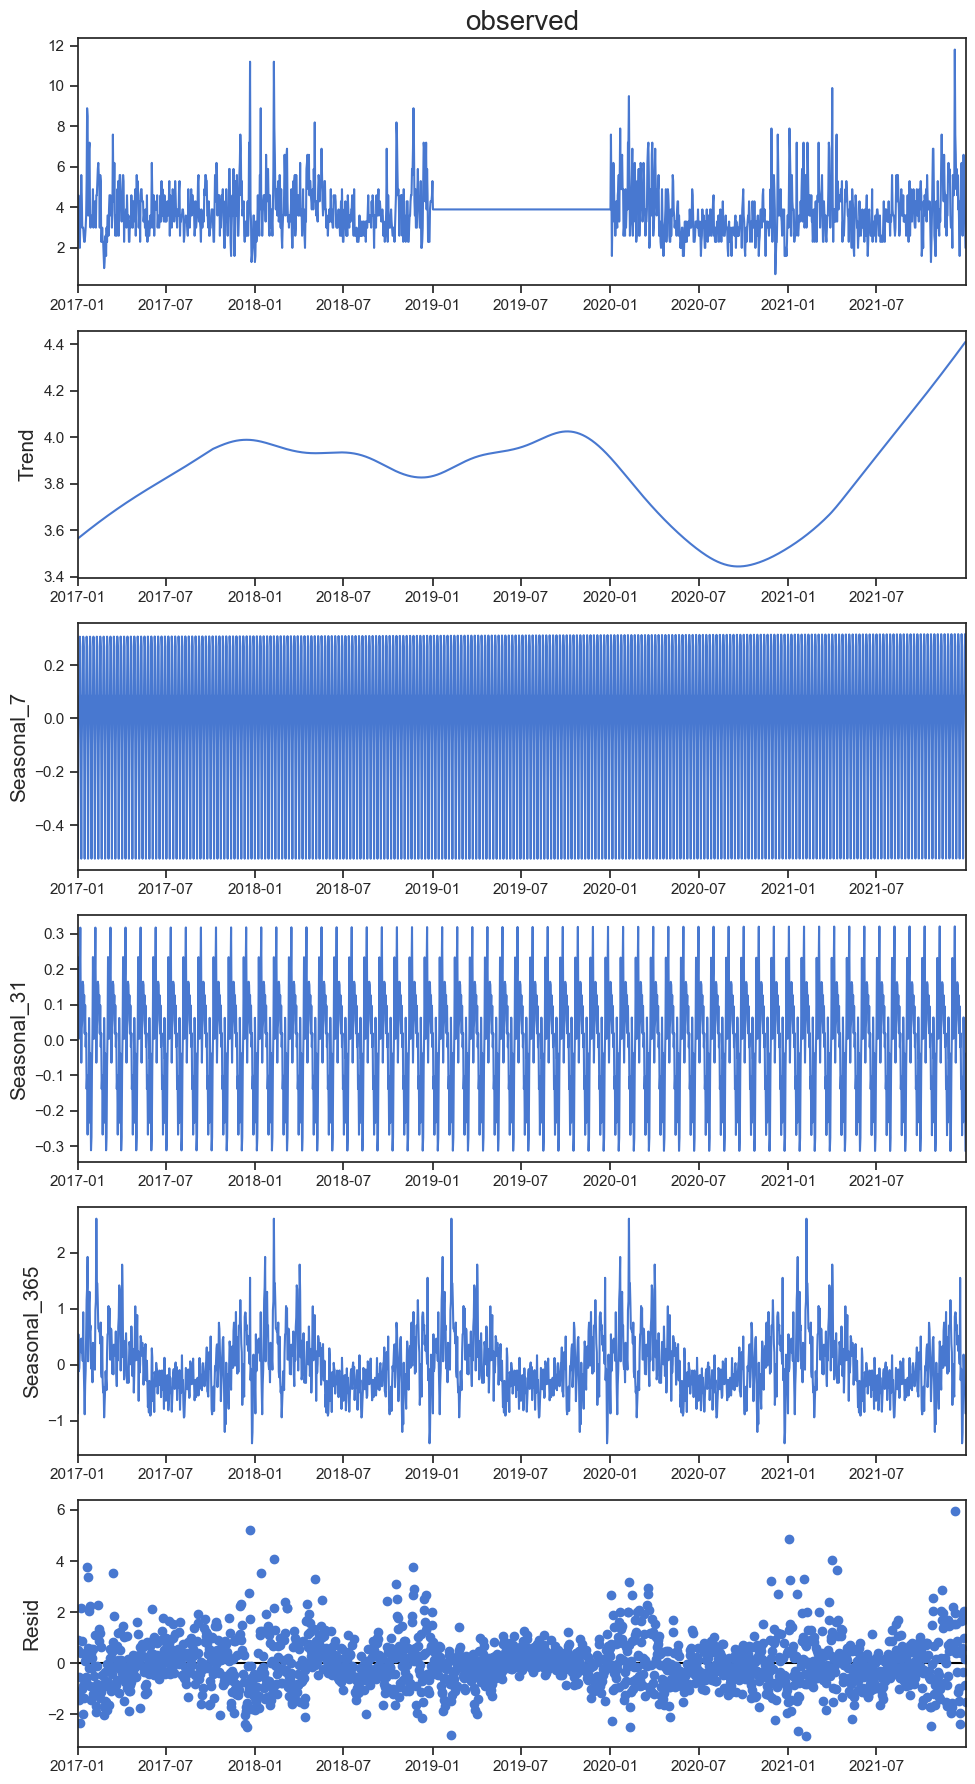

In [38]:
#Decomposing to trend, seasonal and residual components using MSTL
from statsmodels.tsa.seasonal import MSTL

mstl = MSTL(no2_stations['DsSniezkaObs_first_impute'], 
            periods=(7, 31, 365), #Weekly, monthly, and yearly seasonality
            windows=[1001, 501, 101],
            stl_kwargs={
                "seasonal_deg":0, # Means the seasonal smoother is fit with a moving average.
               }
           )

res=mstl.fit()

fig = res.plot()
fig.set_size_inches((10, 18))
fig.tight_layout()

In [40]:
#Filter only those rows that contains missing values
#Then for those rows in DsSniezkaObs that contains null values, take the corresponding rows from both 
#extracted seasonal and trend components and add them and finally subtract residuals

no2_stations['DsSniezkaObs_impute_final'] = no2_stations['DsSniezkaObs']

null_values = no2_stations['DsSniezkaObs'].isna()

no2_stations['DsSniezkaObs_impute_final'].loc[null_values] = \
res.seasonal.loc[null_values].sum(axis=1) + res.trend.loc[null_values] - res.resid.loc[null_values]

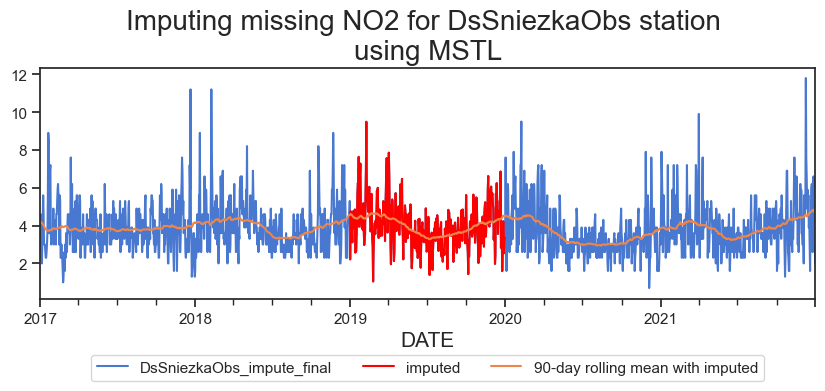

In [43]:
ax = no2_stations['DsSniezkaObs_impute_final'].plot()

no2_stations.loc[null_values, 'DsSniezkaObs_impute_final'].\
    plot(c='red', ax=ax, label='imputed', figsize=(10, 3))

no2_stations['DsSniezkaObs_impute_final'].rolling(90, center=True, min_periods=30).mean().\
    plot(ax=ax, label='90-day rolling mean with imputed')

ax.legend(ncol=3, loc='center', bbox_to_anchor=(0.5, -0.3))
ax.set_title("Imputing missing NO2 for DsSniezkaObs station \nusing MSTL");

Using MSTL to impute the missing values seems to be appropriate here as the overal pattern for each year remains similar.

In [44]:
#Keeping only imputed columns for NO2 dataframe

pattern = re.compile(r'_imputed$|_impute_final$')
no2_stations=\
no2_stations[[col for col in no2_stations.columns if re.search(pattern, col)]]

In [45]:
no2_stations.isna().sum()

POLSTID
LbJarczWolaM_imputed         0
PmLebaRabkaE_imputed         0
DsSniezkaObs_impute_final    0
dtype: int64

In [46]:
no2_stations.columns = [col.split("_")[0] for col in no2_stations.columns]

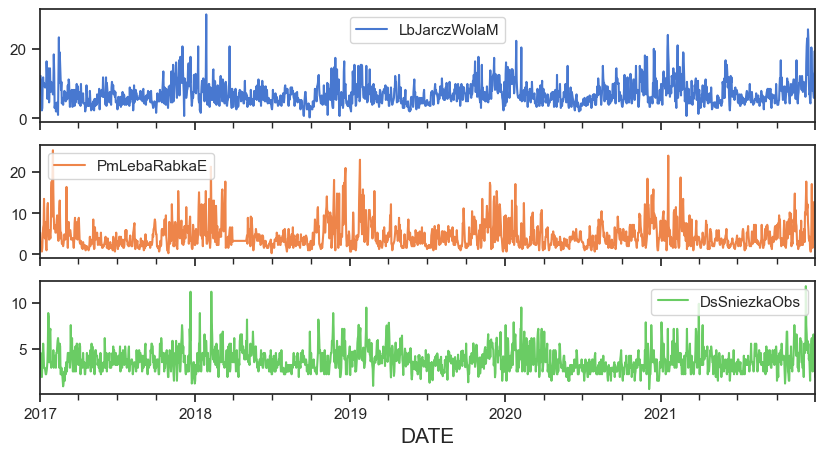

In [48]:
no2_stations.plot(subplots=True, figsize=(10, 5));

# Creating station name prefix

From the time series plots, some stations seems to stop measuring while another station starts measuring the same where the previous station left, as shown in the plot below.

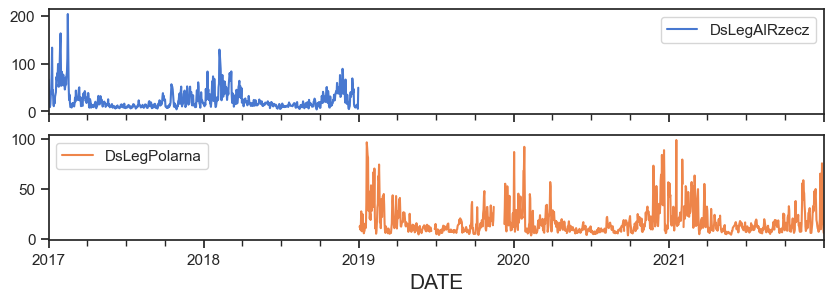

In [54]:
#Example
df.loc[df['POLSTID'].str.contains(r'^DsLeg')].set_index(['DATE', 'POLSTID'])['PM25_24H_AVG_POLLUTION'].\
    unstack('POLSTID').plot(subplots=True, figsize=(10, 3));

The station names starts in a similar pattern where the first 2 letters denotes the voivodship and the next 3 or more letters (until before the next capital letter) represents the powiat/city.

In [57]:
df.loc[
    df['POLSTID'].str.contains(r'^DsLeg'), 
    ['POLSTID', 'Voivodeship', 'City', 'county', 'LAT', 'LON']
].drop_duplicates()

POLSTID   Voivodeship     City          county        LAT        LON
10  DsLegAlRzecz  DOLNOŚLĄSKIE  Legnica  powiat Legnica  51.204503  16.180513
11  DsLegPolarna  DOLNOŚLĄSKIE  Legnica  powiat Legnica  51.208104  16.183784

As seen in the table above, both these stations are from the same location. Even the coordinates are close.

Therefore, it was agreed to combine those stations that are next to each other and shows measurements in the pattern similar to the earlier plot above. In the net section, I will extract a part of the station name inorder to identify stations next to each other

In [58]:
df['station_abbrev'] = df['POLSTID'].str.extract(r'(^[A-Z][a-z][A-Z]+[a-z]+)\d*[A-Z]*.*$', expand=False)

In [61]:
#Creating a df with a list of the abbreviation and corresponding stations
station_groups=\
df[['POLSTID', 'station_abbrev']].drop_duplicates().sort_values(['station_abbrev', 'POLSTID'])

station_groups.head(10)

POLSTID station_abbrev
0  DsBoleslaMOB      DsBolesla
1  DsCzerStraza         DsCzer
2  DsGlogWiStwo         DsGlog
3    DsJaworMOB        DsJawor
4  DsJelGorOgin          DsJel
5  DsJelGorSoko          DsJel
6  DsKamGoraMOB          DsKam
7  DsKlodzSzkol        DsKlodz
8   DsKudowaMOB       DsKudowa
9    DsLadekMOB        DsLadek

In [70]:
#Creating list of abbreviations with multiple stations

print("list of Station abbreviations and the count of stations:\n")
print(station_groups.groupby(['station_abbrev']).size())

#saving the grouped df to a variable
grouped_stations_size = station_groups.groupby(['station_abbrev']).size()

#Filtering out those abbreviations that contains only a single station and saving to mul_stations variable
mul_stations = grouped_stations_size[grouped_stations_size!=1].index

print("\nDataFrame displaying only those abbreviations with multple stations")
station_groups.loc[station_groups['station_abbrev'].isin(mul_stations)]

list of Station abbreviations and the count of stations:

station_abbrev
DsBolesla    1
DsCzer       1
DsGlog       1
DsJawor      1
DsJel        2
            ..
ZpMysl       1
ZpPolcz      1
ZpSzcz       3
ZpSzczec     2
ZpWidu       1
Length: 226, dtype: int64

DataFrame displaying only those abbreviations with multple stations


POLSTID station_abbrev
4        DsJelGorOgin          DsJel
5        DsJelGorSoko          DsJel
10       DsLegAlRzecz          DsLeg
11       DsLegPolarna          DsLeg
12         DsLubanMOB        DsLuban
..                ...            ...
291      ZpSzczAndr01         ZpSzcz
292  ZpSzczBudzWosMOB         ZpSzcz
293      ZpSzczPils02         ZpSzcz
294      ZpSzczec1Maj       ZpSzczec
295      ZpSzczecPrze       ZpSzczec

[110 rows x 2 columns]

The above dataframe can help with finding those stations close to each other in order to impute missing values using measurements from the other station next to each other.

# O3 Stations

In [71]:
#Filtering those stations that do not contain O3 measurements
#Then creating a seperate dataframe for O3 measurements and where each station is a column
o3_stations=\
df.loc[~df['POLSTID'].isin(o3_null_stations)].\
    groupby(['POLSTID', 'DATE'])['O3_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID')

#Setting daily frequncy as daily
o3_stations.index.freq='D'

o3_stations.head()

POLSTID     DsBoleslaMOB  DsCzerStraza  DsJelGorOgin  DsKlodzSzkol  \
DATE                                                                 
2017-01-01           NaN         90.39         11.98         15.24   
2017-01-02           NaN         46.19         19.04          6.71   
2017-01-03           NaN         59.58         46.34         28.45   
2017-01-04           NaN         68.96         51.37         51.49   
2017-01-05           NaN         69.62         59.68         65.63   

POLSTID     DsKudowaMOB  DsLadekMOB  DsLegAlRzecz  DsLubanMOB  \
DATE                                                            
2017-01-01          NaN         NaN         20.63         NaN   
2017-01-02          NaN         NaN         18.14         NaN   
2017-01-03          NaN         NaN         42.42         NaN   
2017-01-04          NaN         NaN         53.37         NaN   
2017-01-05          NaN         NaN         55.18         NaN   

POLSTID     DsLubanMieszMOB  DsOlawZolnAK  ...  WmOstrPilsud  WmPuszczaBor  \
DATE                                       ...                               
2017-01-01              NaN           NaN  ...           NaN         31.47   
2017-01-02              NaN           NaN  ...           NaN         52.38   
2017-01-03              NaN           NaN  ...           NaN         57.43   
2017-01-04              NaN           NaN  ...           NaN         58.41   
2017-01-05              NaN           NaN  ...           NaN         63.12   

POLSTID     WpBoroDrapal  WpKaliSawick  WpKoniWyszyn  WpPiaskiKrzy  \
DATE                                                                 
2017-01-01         34.56         39.08         43.55           NaN   
2017-01-02         24.87         28.02         27.66           NaN   
2017-01-03         41.12         46.56         44.86           NaN   
2017-01-04         56.47         61.87         62.32           NaN   
2017-01-05         65.00         66.41         65.54         75.49   

POLSTID     WpPoznDabrow  ZpKoszChopin  ZpSzczAndr01  ZpWiduBulRyb  
DATE                                                                
2017-01-01         31.05           NaN         40.48         40.23  
2017-01-02         22.17           NaN         36.73         43.31  
2017-01-03         36.90           NaN         45.63         44.53  
2017-01-04         53.36           NaN         58.73         64.38  
2017-01-05         69.30           NaN         60.34         69.73  

[5 rows x 125 columns]

In [72]:
#Sorting columns by station name in order to compare when observing time series plots
o3_stations = o3_stations[np.sort(o3_stations.columns)]

In [74]:
#Grouping by O3 stations and checking count of null values.
o3_stn_null_cnt = o3_stations.isnull().sum()
o3_stn_null_cnt

POLSTID
DsBoleslaMOB    1471
DsCzerStraza     737
DsJelGorOgin       0
DsKlodzSzkol      30
DsKudowaMOB     1473
                ... 
WpPiaskiKrzy       7
WpPoznDabrow       3
ZpKoszChopin     736
ZpSzczAndr01      26
ZpWiduBulRyb       4
Length: 125, dtype: int64

In [75]:
#Saving those O3 stations with count of null values higher and equal to 364 
#(more than a year of missing values)
o3_high_incomplete = o3_stn_null_cnt[o3_stn_null_cnt>=364].sort_index().index

#Saving those O3 stations with count of null values between 31 and 363
o3_mid_incomplete = o3_stn_null_cnt[o3_stn_null_cnt.between(31, 363)].index

#Saving those O3 stations with count of null values between 1 and 30
o3_low_incomplete = o3_stn_null_cnt[o3_stn_null_cnt.between(1, 30)].index

In [76]:
#Imputing O3 stations with less than 30 null values using simple linear interpolation

o3_stations[o3_low_incomplete]=\
o3_stations[o3_low_incomplete].interpolate('linear', limit_direction='both')

In [78]:
#Creating a function that imputes a column using MSTL
def impute_with_MSTL(df, col):
    """Function to decompse the time series and then impute the missing values of the column"""
    
    null_values = df[col].isna()
    
    #First imputation using linear interpolation
    temp_df = df[col].interpolate('linear', limit_direction='both')
    
    #Creating MSTL
    mstl = MSTL(temp_df, 
            periods=(7, 31, 365), #Weekly, monthly, and yearly seasonality
            windows=[1001, 501, 101],
            stl_kwargs={
                "seasonal_deg":0, # Means the seasonal smoother is fit with a moving average.
               }
           )

    res=mstl.fit()
    
    #imputting missing values
    temp_df.loc[null_values] = \
    res.seasonal.loc[null_values].sum(axis=1) + res.trend.loc[null_values] - res.resid.loc[null_values]
    
    #Plot the results
    imputation_plot(temp_df=temp_df, null_values=null_values, col=col)
    
    return temp_df

#Creating a function to plot the imputation results
def imputation_plot(temp_df, null_values, col):
    """Function to plot the time series and the imputed data with 90day rolling mean."""
    
    ax = temp_df.plot(figsize=(10, 3))
    
    temp_df.loc[null_values].plot(linestyle='', marker='*', c='red', ax=ax, label='imputed')
    temp_df.rolling(90, center=True, min_periods=30).mean().plot(ax=ax, label='90day Rolling Mean')

    ax.legend(ncol=3, loc='upper right')
    ax.set_title(f"Imputing {col} using MSTL");
    plt.show();

  0%|          | 0/16 [00:00<?, ?it/s]

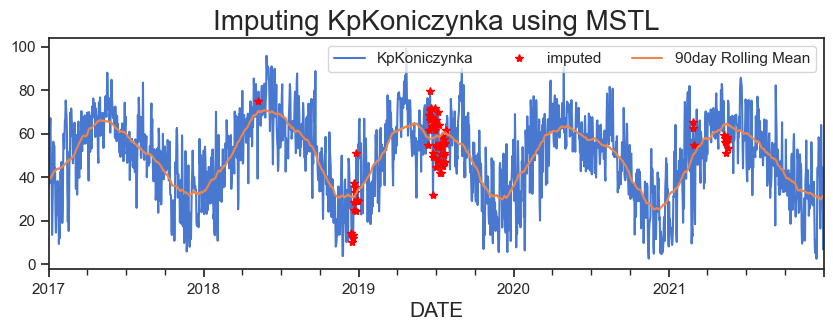

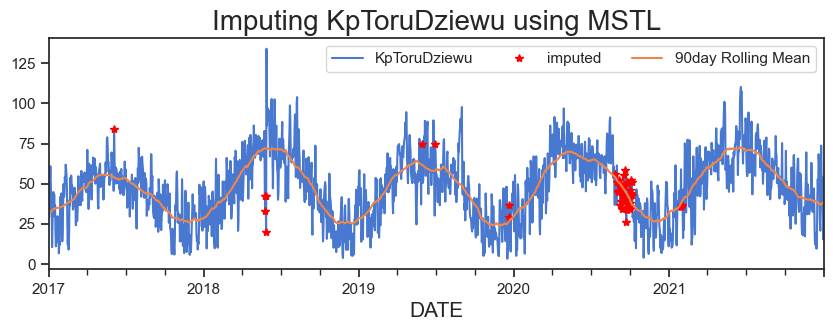

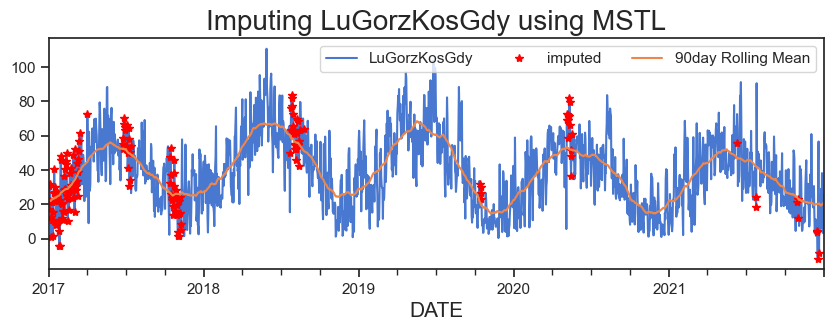

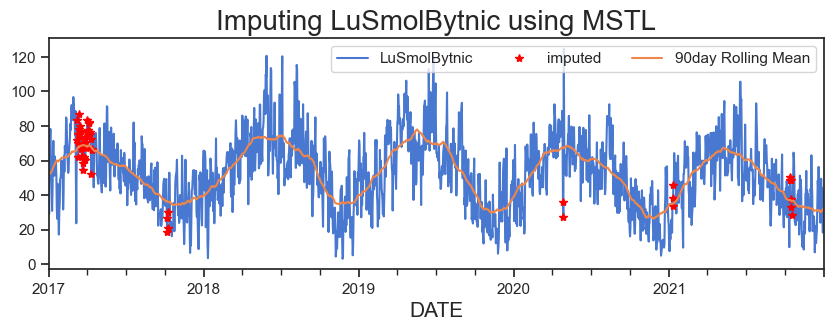

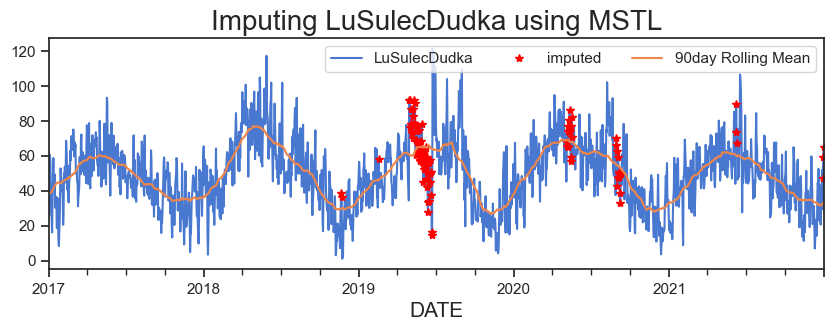

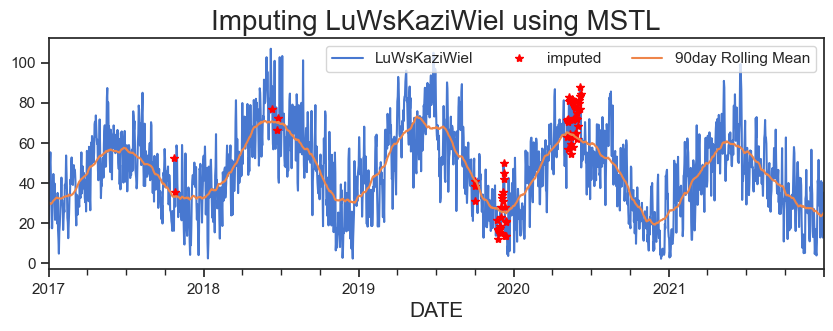

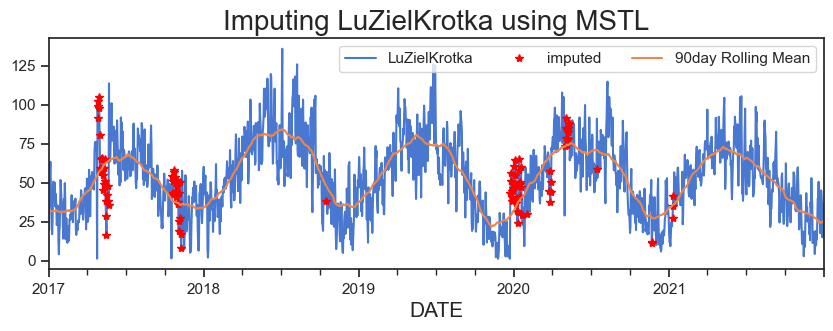

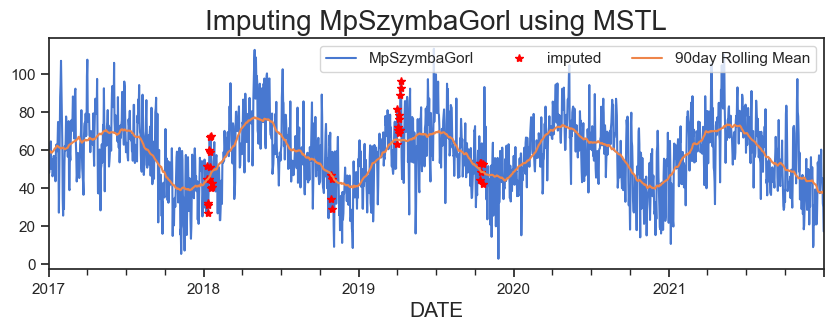

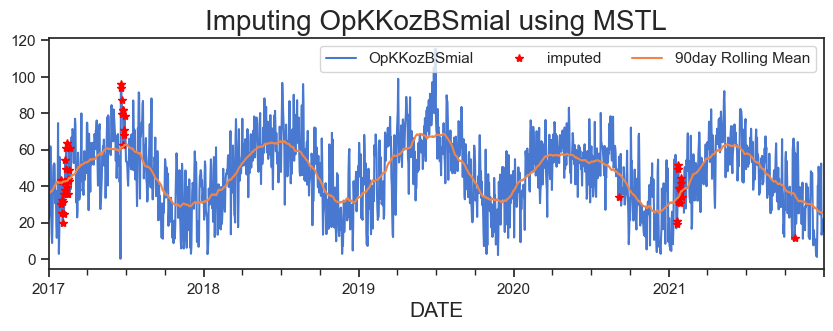

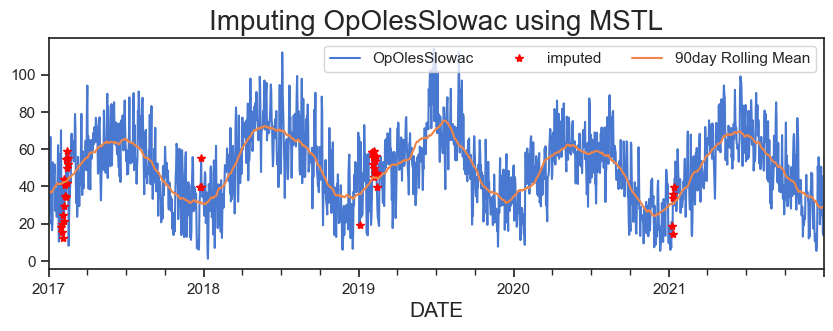

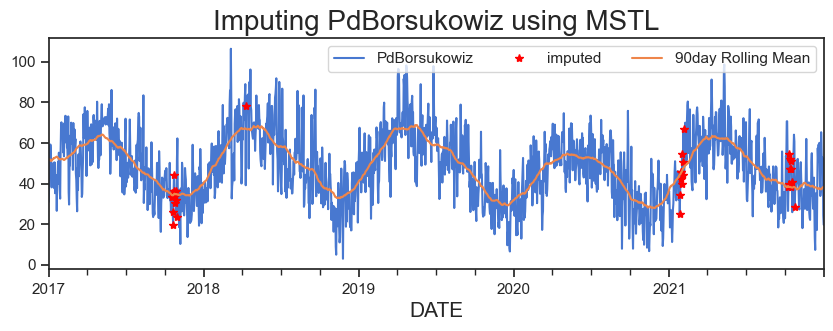

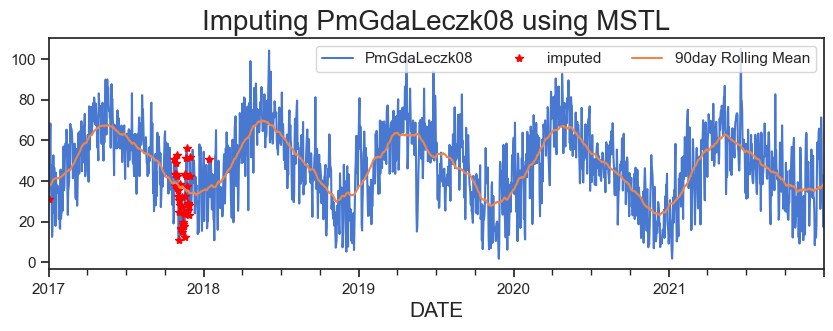

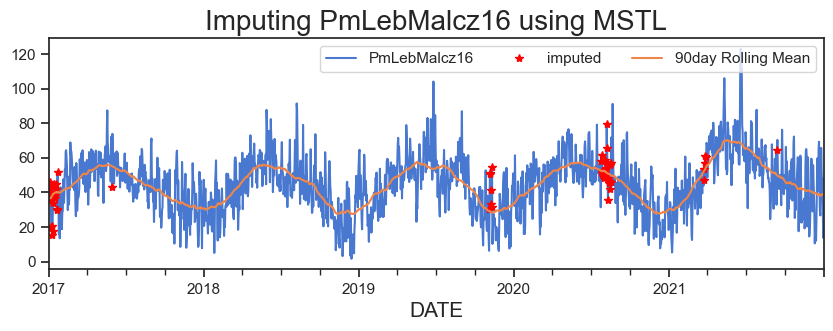

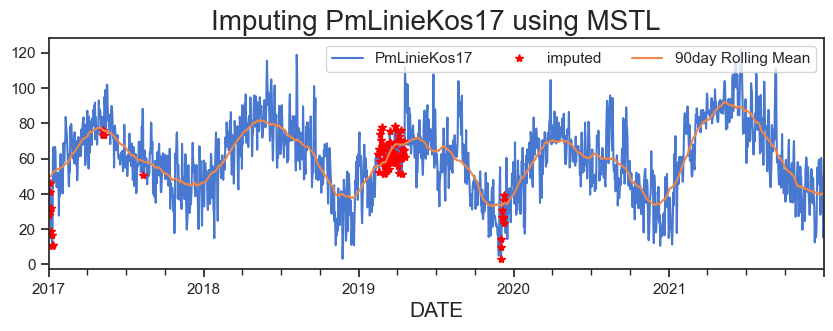

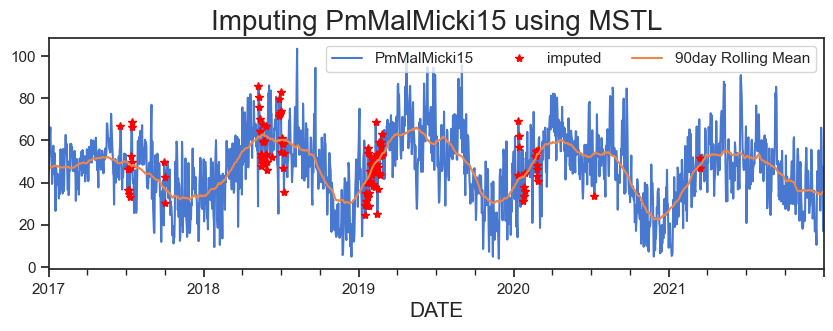

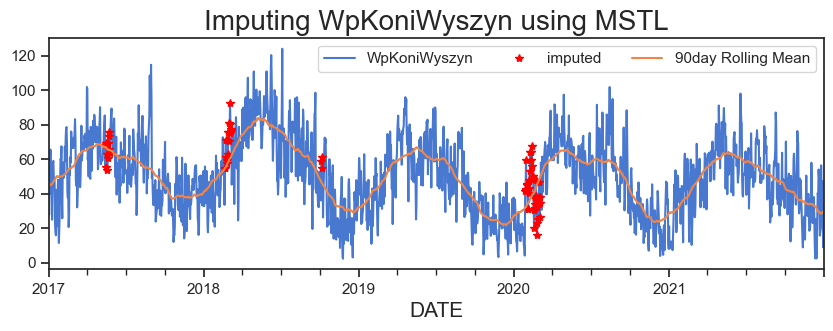

Wall time: 46.8 s


In [79]:
%%time
#Imputing stations between 15 and 363 null values using MSTL
for col in tqdm(o3_mid_incomplete):
    o3_stations[col] = impute_with_MSTL(df=o3_stations, col=col)

In [81]:
#Al stations having count of null values between 15 and 363 successfully imputed using MSTL
o3_stations[o3_mid_incomplete].isnull().sum()

POLSTID
KpKoniczynka    0
KpToruDziewu    0
LuGorzKosGdy    0
LuSmolBytnic    0
LuSulecDudka    0
LuWsKaziWiel    0
LuZielKrotka    0
MpSzymbaGorl    0
OpKKozBSmial    0
OpOlesSlowac    0
PdBorsukowiz    0
PmGdaLeczk08    0
PmLebMalcz16    0
PmLinieKos17    0
PmMalMicki15    0
WpKoniWyszyn    0
dtype: int64

# Trying to Merge similar stations - In Progress

In [ ]:
mul_o3_stn_high_null_df = \
station_groups.loc[
    station_groups['station_name_prefix'].isin(mul_stations) &
    station_groups['POLSTID'].isin(o3_high_incomplete)
]

mul_o3_stn_high_null_abbrev_list=\
mul_o3_stn_high_null_df.groupby('station_name_prefix').size()\
[mul_o3_stn_high_null_df.groupby('station_name_prefix').size()>1].index

mul_o3_stn_high_null_abbrev_list

In [ ]:
o3_high_null_mul_stns_list=\
set(o3_high_incomplete).intersection(
    set(
        station_groups.loc[
            station_groups['station_name_prefix'].isin(mul_o3_stn_high_null_abbrev_list), 'POLSTID'
        ]
    )
)

In [ ]:
o3_stations[np.sort(list(o3_high_null_mul_stns_list))].plot(subplots=True, figsize=(10, 20));